<a href="https://colab.research.google.com/github/mishramayank418/nlp/blob/main/09_Skimlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 40.18 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:
!ls /PubMed_20k_RCTpubmed-rct_numbers_replaced_with_at_sign

ls: cannot access '/PubMed_20k_RCTpubmed-rct_numbers_replaced_with_at_sign': No such file or directory


In [3]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"


In [4]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [5]:
# Create function to read the lines of a document
def get_lines(filename):
  with open(filename,"r") as f:
    return f.readlines()




In [6]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [7]:
def preprocess_text_with_line_number(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data ={}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) -1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples





In [8]:
%%time
train_samples = preprocess_text_with_line_number(data_dir + "train.txt")
val_samples = preprocess_text_with_line_number(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_number(data_dir + "test.txt")
len(train_samples), len(val_samples),len(test_samples)

CPU times: user 762 ms, sys: 91.1 ms, total: 853 ms
Wall time: 1.36 s


(180040, 30212, 30135)

In [9]:
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [10]:
import pandas as pd
train_df  = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df  = pd.DataFrame(test_samples)
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [11]:
train_df["target"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

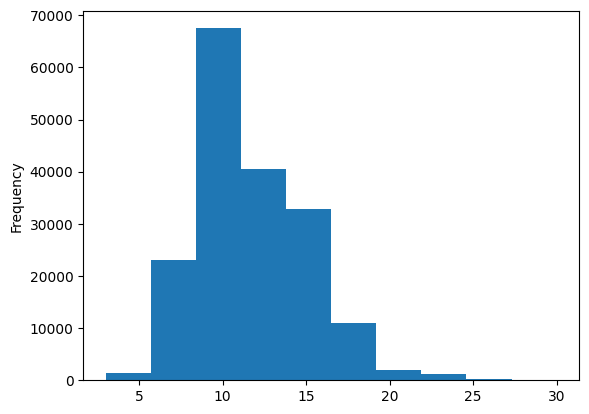

In [12]:
train_df.total_lines.plot.hist()

In [13]:
# Convert abstract text lines into lists
train_sentence = train_df["text"].tolist()
val_sentence = val_df["text"].tolist()
test_sentence = test_df["text"].tolist()
train_sentence[0:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [14]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot  = OneHotEncoder(sparse = False)
train_labels_onehot = one_hot.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_onehot = one_hot.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_onehot = one_hot.fit_transform(test_df["target"].to_numpy().reshape(-1,1))
train_labels_onehot


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [16]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([("tf-idf", TfidfVectorizer()), ("clf",MultinomialNB())])
model_0.fit(X = train_sentence, y = train_labels_encoded);

In [18]:
model_0.score(val_sentence,val_labels_encoded)

0.7218323844829869

In [19]:
baseline_preds = model_0.predict(val_sentence)

In [20]:
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [21]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import calculate_results

--2023-11-26 15:34:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-26 15:34:32 (96.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [22]:
baseline_results = calculate_results(val_labels_encoded,baseline_preds)

In [23]:
train_sentence

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [24]:
import numpy as np
sent_lens = [len(sentence.split()) for sentence in train_sentence ]
avg_sent_lens = np.mean(sent_lens)
avg_sent_lens

26.338269273494777

(array([1.25846e+05, 4.78220e+04, 5.37600e+03, 7.86000e+02, 1.46000e+02,
        3.20000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([  1. ,  30.5,  60. ,  89.5, 119. , 148.5, 178. , 207.5, 237. ,
        266.5, 296. ]),
 <BarContainer object of 10 artists>)

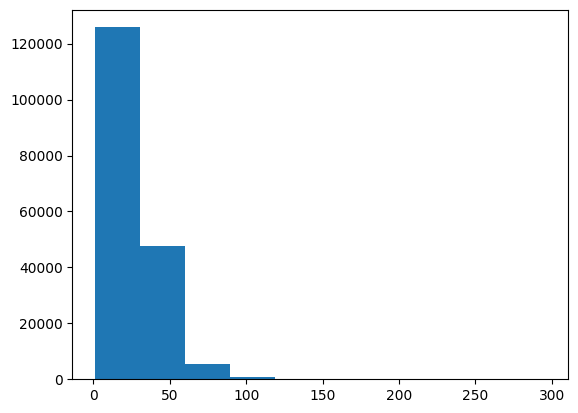

In [25]:
import matplotlib.pyplot as plt
plt.hist(sent_lens)

In [26]:
np.percentile(sent_lens,95)


55.0

In [27]:
max(sent_lens)

296

In [28]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000
from tensorflow.keras.layers import  TextVectorization
text_vectorizer = TextVectorization(max_tokens = max_tokens, output_sequence_length = 55)

In [29]:
text_vectorizer.adapt(train_sentence)

In [30]:
import random
target_sentence = random.choice(train_sentence)
print(target_sentence)
print(len(target_sentence.split()))
print(text_vectorizer(target_sentence))

less than half of breast cancer survivors with lymphedema perform self-care as directed .
14
tf.Tensor(
[ 211   42 1398    4  413  135 1313    7 6637 1685 2833   25 4389    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0], shape=(55,), dtype=int64)


In [31]:
rct_20_text_vocab  = text_vectorizer.get_vocabulary()


In [32]:
import tensorflow as tf
token_embed = tf.keras.layers.Embedding(input_dim = len(rct_20_text_vocab), output_dim = 128,mask_zero=True)

In [33]:
# Turn our data into TensorFlow Datasets
train_dataset  = tf.data.Dataset.from_tensor_slices((train_sentence, train_labels_onehot))
val_dataset  = tf.data.Dataset.from_tensor_slices((val_sentence, val_labels_onehot))
test_dataset  = tf.data.Dataset.from_tensor_slices((test_sentence, test_labels_onehot))
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [34]:
train_sentence[0:2]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .']

In [35]:
# Conv 1D Model
inputs = tf.keras.Input(shape = (1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
x=token_embed(text_vectors)
x = tf.keras.layers.Conv1D(filters = 64,kernel_size = 5,activation  = "relu")(x)
x= tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(num_classes,activation  = "softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)
model_1.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])


In [36]:
history_1 = model_1.fit(train_dataset, epochs  =3, validation_data = val_dataset, validation_steps=(0.1*len(val_dataset)))

Epoch 1/3
5627/5627 [==============================] - 68s 10ms/step - loss: 0.6316 - accuracy: 0.7687 - val_loss: 0.5425 - val_accuracy: 0.8033
Epoch 2/3
5627/5627 [==============================] - 35s 6ms/step - loss: 0.4537 - accuracy: 0.8405 - val_loss: 0.5354 - val_accuracy: 0.8082
Epoch 3/3
5627/5627 [==============================] - 35s 6ms/step - loss: 0.3676 - accuracy: 0.8737 - val_loss: 0.5720 - val_accuracy: 0.8016


In [37]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5664 - accuracy: 0.8078


[0.5664342045783997, 0.8077915906906128]

In [38]:
model_1_pred_probs = model_1.predict(val_sentence)

945/945 [==============================] - 2s 2ms/step


In [39]:
model_1_pred_probs

array([[7.6373786e-01, 1.2192543e-02, 7.5965360e-02, 1.2764204e-01,
        2.0462191e-02],
       [6.7255181e-01, 9.7327366e-02, 6.8789967e-03, 2.0490155e-01,
        1.8340306e-02],
       [5.6288388e-02, 1.7582153e-03, 3.9537271e-04, 9.4155067e-01,
        7.3260890e-06],
       ...,
       [1.9040603e-07, 2.4790763e-06, 1.1325284e-03, 2.5201231e-07,
        9.9886453e-01],
       [2.4386425e-02, 5.0255531e-01, 1.4202625e-01, 8.0762058e-03,
        3.2295588e-01],
       [3.5609314e-03, 9.9288177e-01, 2.0921500e-03, 3.9756666e-05,
        1.4253638e-03]], dtype=float32)

In [40]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)

In [41]:
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [42]:
model_1_results = calculate_results(val_labels_encoded, model_1_preds)

In [43]:
model_1_results

{'accuracy': 80.7791605984377,
 'precision': 0.8053437660773427,
 'recall': 0.807791605984377,
 'f1': 0.8051899097708441}

In [44]:
# Model - 2 :  Feature extraction with pretrained token embeddings
import tensorflow_hub as hub
tf_hub_embedding_layer  = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable = False)


In [45]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x= tf.keras.layers.Dense(128,activation = "relu")(pretrained_embedding)
outputs = tf.keras.layers.Dense(5,activation = "softmax")(x)
model_2 = tf.keras.Model(inputs,outputs)
model_2.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])



In [46]:
history_2 = model_2.fit(train_dataset, epochs  =3, validation_data = val_dataset, validation_steps=(0.1*len(val_dataset)))

Epoch 1/3
5627/5627 [==============================] - 81s 14ms/step - loss: 0.7337 - accuracy: 0.7187 - val_loss: 0.6560 - val_accuracy: 0.7516
Epoch 2/3
5627/5627 [==============================] - 74s 13ms/step - loss: 0.6367 - accuracy: 0.7583 - val_loss: 0.6173 - val_accuracy: 0.7674
Epoch 3/3
5627/5627 [==============================] - 75s 13ms/step - loss: 0.6023 - accuracy: 0.7722 - val_loss: 0.6044 - val_accuracy: 0.7737


In [47]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 12s 12ms/step - loss: 0.6062 - accuracy: 0.7695


[0.6062358021736145, 0.7695286870002747]

In [48]:
# Charecter level Embedding
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))



In [49]:
split_chars("my name is mayank")

'm y   n a m e   i s   m a y a n k'

In [50]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentence]
val_chars = [split_chars(sentence) for sentence in val_sentence]
test_chars = [split_chars(sentence) for sentence in test_sentence]


In [51]:
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [52]:
char_lens = [len(sentence) for sentence in train_sentence]
mean_char_len = np.mean(char_lens)
mean_char_len
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [53]:
# get all keyboard charecters
import string
alphabet  = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

In [55]:
char_vectorizer.adapt(train_chars)
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")


Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [56]:
char_embed = tf.keras.layers.Embedding(input_dim = NUM_CHAR_TOKENS,output_dim = 25,mask_zero = False,name = 'char_embed')


In [57]:
inputs = tf.keras.layers.Input(shape = (1,), dtype = tf.string)
char_vectors = char_vectorizer(inputs)
char_embed_layer = char_embed(char_vectors)
x= tf.keras.layers.Conv1D(64,5,activation ="relu")(char_embed_layer)
x= tf.keras.layers.GlobalAveragePooling1D()(x)
x= tf.keras.layers.Dense(64,activation ="relu")(x)
outputs = tf.keras.layers.Dense(5,activation  = "softmax")(x)
model_3 = tf.keras.Model(inputs,outputs)
model_3.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])




In [58]:
train_char_dataset  = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars,val_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [59]:


history_3 = model_3.fit(train_char_dataset,epochs =  3, validation_data = val_char_dataset)

Epoch 1/3
5627/5627 [==============================] - 39s 7ms/step - loss: 1.2732 - accuracy: 0.4635 - val_loss: 1.1709 - val_accuracy: 0.5159
Epoch 2/3
5627/5627 [==============================] - 35s 6ms/step - loss: 1.0941 - accuracy: 0.5480 - val_loss: 1.0286 - val_accuracy: 0.5704
Epoch 3/3
5627/5627 [==============================] - 35s 6ms/step - loss: 0.9661 - accuracy: 0.6040 - val_loss: 0.9328 - val_accuracy: 0.6159


In [60]:
#. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = tf.keras.layers.Concatenate(name = "token_char_layer")([model_2.output,model_3.output])

In [61]:
combined_dropout = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(64,activation ="relu")(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(5,activation  = "softmax")(final_dropout)
model_4 = tf.keras.Model(inputs = [model_2.input,model_3.input], outputs = output_layer)



In [62]:
model_4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['input_3[0][0]']             
 rization)                                                                                        
                                                                                                  
 char_embed (Embedding)      (None, 290, 25)              1750      ['char_vectorizer[0][0]']     
                                                                                                  
 input_2 (InputLayer)        [(None,)]                    0         []                      

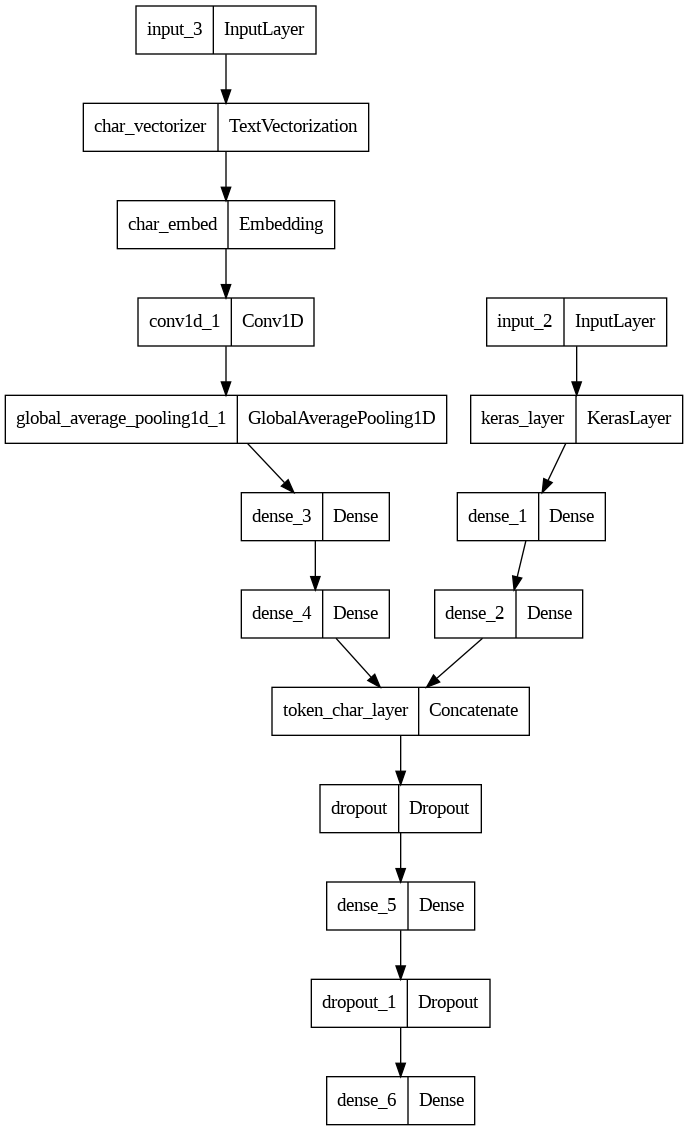

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [64]:
model_4.compile(loss = "categorical_crossentropy", optimizer ="Adam",metrics  = ["accuracy"])

In [65]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentence,train_chars))
train_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_onehot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,train_char_labels))
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentence,val_chars))
val_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_onehot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data,val_char_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [66]:
histort_4 = model_4.fit(train_char_token_dataset, epochs =3, validation_data = val_char_token_dataset)

Epoch 1/3
5627/5627 [==============================] - 111s 19ms/step - loss: 0.9365 - accuracy: 0.6181 - val_loss: 0.7763 - val_accuracy: 0.7486
Epoch 2/3
5627/5627 [==============================] - 107s 19ms/step - loss: 0.8629 - accuracy: 0.6542 - val_loss: 0.7977 - val_accuracy: 0.7303
Epoch 3/3
5627/5627 [==============================] - 108s 19ms/step - loss: 0.8346 - accuracy: 0.6718 - val_loss: 0.7987 - val_accuracy: 0.7189


In [67]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

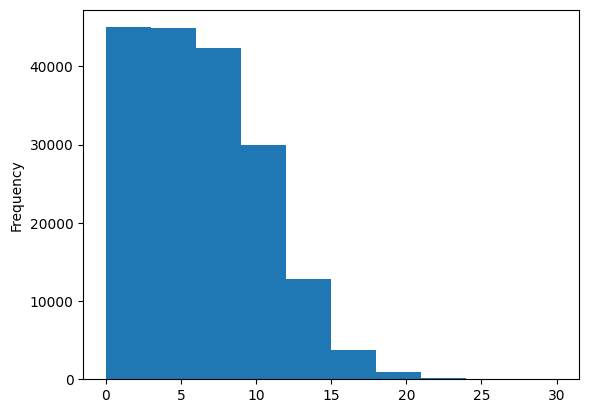

In [68]:
train_df["line_number"].plot.hist()

In [69]:
train_line_numbers_onehot = tf.one_hot(train_df["line_number"].to_numpy(), depth = 15)
val_line_numbers_onehot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 15)
test_line_numbers_onehot = tf.one_hot(test_df["line_number"].to_numpy(), depth = 15)


In [70]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<Axes: ylabel='Frequency'>

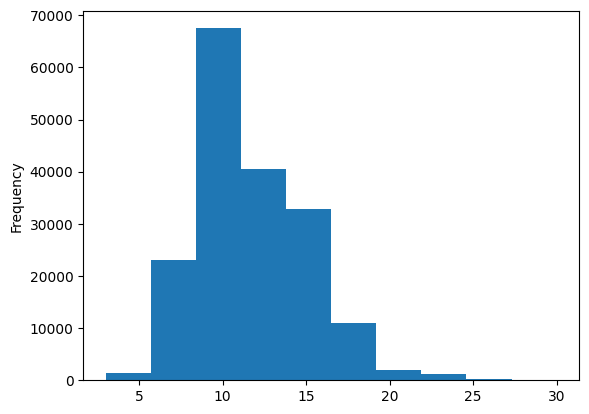

In [71]:
train_df["total_lines"].plot.hist()

In [72]:
train_total_lines_onehot = tf.one_hot(train_df["total_lines"].to_numpy(), depth = 20)
val_total_lines_onehot = tf.one_hot(val_df["total_lines"].to_numpy(), depth = 20)
test_total_lines_onehot = tf.one_hot(test_df["total_lines"].to_numpy(), depth = 20)


In [73]:
# Building a tribid Embedding Model
#Token Inputs
token_inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
token_embedding = tf_hub_embedding_layer(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation  = "relu")(token_embedding)
token_model = tf.keras.Model(token_inputs,token_outputs)

# Char Inputs
char_inputs = tf.keras.layers.Input(shape =(1,), dtype = tf.string)
char_embedding = char_embed(char_inputs)
#char_outputs = tf.keras.layers.Dense(128,activation  = "relu")(char_embedding)
char_outputs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(char_embedding)
char_model = tf.keras.Model(char_inputs,char_outputs)

#line number input
line_number_inputs = tf.keras.layers.Input(shape = (15,))
x = tf.keras.layers.Dense(128,activation  = "relu")(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs,x)

#Total Line model
total_line_inputs = tf.keras.layers.Input(shape = (20,))
y = tf.keras.layers.Dense(128,activation = "relu")(total_line_inputs)
total_line_model = tf.keras.Model(total_line_inputs, y)

# combining token and embedding layers
combined_embedding  = tf.keras.layers.Concatenate()([token_model.output,char_model.output])
z= tf.keras.layers.Dense(256, activation  = "relu")(combined_embedding)
z = tf.keras.layers.Dropout(0.5)(z)
# Combining all layers

z = tf.keras.layers.Concatenate()([line_number_model.output,total_line_model.output,z])

output_layer = tf.keras.layers.Dense(5,activation  = "softmax")(z)
model_5 = tf.keras.Model([token_model.input,char_model.input,line_number_model.input,total_line_model.input],output_layer)




In [74]:
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978   ['input_4[0][0]']             
                                                          24                                      
                                                                                                  
 char_embed (Embedding)      multiple                     1750      ['input_5[0][0]']       

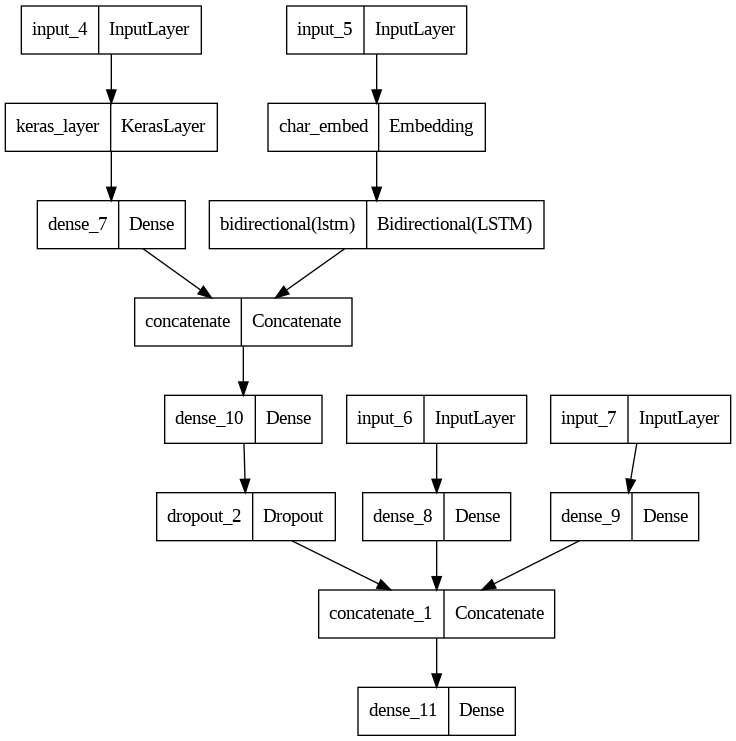

In [75]:
plot_model(model_5)

In [76]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])